* https://www.youtube.com/watch?v=wnTlsXaVj-s

### Step-1: Load data

In [28]:
import pandas as pd

df = pd.read_excel('data.xlsx')

In [29]:
df.head()

,age,income,dependents,has_property,has_car,credit_score,job_tenure,has_education,loan_amount,loan_period,delay_days
0,76,32181,3,0,1,814,28,1,142434,1770,0
1,69,52789,8,1,0,501,28,1,120887,1590,7
2,19,70535,1,0,1,325,26,1,188766,810,0
3,31,85271,1,0,1,525,29,1,406792,330,0
4,18,19974,2,0,1,618,34,1,155240,1560,43


In [30]:
df[['has_car','credit_score', 'job_tenure', 'has_education' ]].to_numpy()

array([[  1, 814,  28,   1],
       [  0, 501,  28,   1],
       [  1, 325,  26,   1],
       ...,
       [  1, 836,  28,   0],
       [  0, 370,  39,   0],
       [  0, 852,  18,   0]])

In [177]:
y = df['delay_days'].to_numpy()
X = df[['has_car','credit_score', 'job_tenure', 'has_education' ]].to_numpy()

### Step-2:

In [32]:
import numpy as np
import pandas as pd


class GradientBoostingRegressor():
    """Gradient boosting regressor."""
    def __init__(self):    
        self.base_pred_ = None

    def fit(self, X, y):
        """Fit the model to the data.

        Args:
            X: array-like of shape (n_samples, n_features)
            y: array-like of shape (n_samples,)

        Returns:
            GradientBoostingRegressor: The fitted model.
            
        """
        self.base_pred_ = np.mean(y)
    

    def predict(self, X):
        """Predict the target of new data.

        Args:
            X: array-like of shape (n_samples, n_features)

        Returns:
            y: array-like of shape (n_samples,)
            The predict values.
            
        """
        predictions = np.full(X.shape[0], fill_value=self.base_pred_)

        return predictions


In [33]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y)

In [34]:
y_pred = gbr.predict(X)

### Step-3: loss-function

In [212]:
import numpy as np
from typing import Tuple


def mse(y_true: np.ndarray, y_pred: np.ndarray) -> Tuple[float, np.ndarray]:
    """Mean squared error loss function and gradient."""
    loss = float(np.sum(np.square(y_pred - y_true)) * 1/y_true.shape)
    grad = y_pred - y_true
    return loss, grad


def mae(y_true: np.ndarray, y_pred: np.ndarray) -> Tuple[float, np.ndarray]:
    """Mean absolute error loss function and gradient."""
    loss = float(np.sum(np.abs(y_pred - y_true)) * 1/y_true.shape)
    grad = np.sign(y_pred - y_true)
    return loss, grad

In [49]:
mse(y, y_pred)
mae(y, y_pred)

(14.626923999999999,
 array([ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
         1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,
         1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,
         1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
         1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        -1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
         1.,  1.,  1., -1.,  1

### Step-4: Boosting

In [219]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor


class GradientBoostingRegressor:
    def __init__(
        self,
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        min_samples_split=2,
        loss="mse",
        verbose=False,
        subsample_size=0.5, 
        replace=False
    ):
        
        self.base_pred_ = None
        self.trees_ = []
        if loss == "mse":
            self.loss = self._mse
        else: 
            self.loss = loss
            
        self.n_estimators=n_estimators
        self.learning_rate=learning_rate
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.verbose=verbose
        self.subsample_size=subsample_size
        self.replace=replace
        self.loss_list_= []
        
    def _mse(self, y_true, y_pred):
        loss = np.mean(np.square(y_pred - y_true))
        grad = y_pred - y_true
        return loss, grad
    
    def _subsample(self, X, grad): 
        index = np.random.choice(X.shape[0], size=int(X.shape[0]*self.subsample_size), replace=self.replace)
        sub_X = X[index]
        sub_grad = grad[index]
        return sub_X, sub_grad

    def fit(self, X, y):
        """
        Fit the model to the data.

        Args:
            X: array-like of shape (n_samples, n_features)
            y: array-like of shape (n_samples,)

        Returns:
            GradientBoostingRegressor: The fitted model.
        """
        self.base_pred_ = np.mean(y)
        y_pred = np.full(int(X.shape[0]), fill_value=self.base_pred_)
        for i in range(self.n_estimators):
            loss_, grad_ = self.loss(y, y_pred)
            X_sub, grad_sub = self._subsample(X, grad_)
            b_i = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            b_i.fit(X_sub, (-grad_sub))
            y_pred += self.learning_rate*b_i.predict(X)
            self.trees_.append(b_i)
            self.loss_list_.append(loss_)
            if self.verbose:
                print(loss_) 
            
        

    def predict(self, X):
        """Predict the target of new data.

        Args:
            X: array-like of shape (n_samples, n_features)

        Returns:
            y: array-like of shape (n_samples,)
            The predict values.
            
        """
        
        predictions = np.full(X.shape[0], fill_value=self.base_pred_)
        for tree_i in self.trees_:
            predictions += self.learning_rate*tree_i.predict(X)
        
        return predictions


##### Проверка класса, график

In [220]:
# Поддержка трех вариантов передачи функции потерь


# Example 1. Default loss
print('Model with Default loss')
model = GradientBoostingRegressor(n_estimators=10, verbose=True)
model.fit(X, y)

print('\nModel with Specific loss')
# Example 2. Specific loss from list of supported functions
model = GradientBoostingRegressor(n_estimators=10, verbose=True, loss="mse")
model.fit(X, y)


# Example 3. User-defined function
def user_loss(y_true, y_pred):
    loss = float(np.sum(np.abs(y_pred - y_true)) * 1/y_true.shape)
    grad = np.sign(y_pred - y_true)
    return loss, grad
print('\nModel with User-defined loss')
model = GradientBoostingRegressor(n_estimators=10, verbose=True, loss=user_loss)
model.fit(X, y)

Model with Default loss
408.523319
407.2065767522467
405.20021289155613
404.04532331531993
399.78833655235945
399.0043959979868
395.8809302218465
394.5874381781824
392.0885113910718
390.90293715309446

Model with Specific loss
408.523319
406.63663717318286
403.96881422575524
401.80934042490117
398.36004367259903
397.4080935668928
396.4988073393905
394.2420479192034
392.04725375627214
389.74877354446846

Model with User-defined loss
14.626923999999999
14.609006241472256
14.594308360116324
14.577811805758731
14.562574450386828
14.547081593243973
14.533481026741512
14.517458736101116
14.504158183773317
14.488168267013993


MSE | Train = 280.8948934972339 | Test = 415.8267934680004
RMSE | Train = 16.75991925688289 | Test = 20.391831537848688


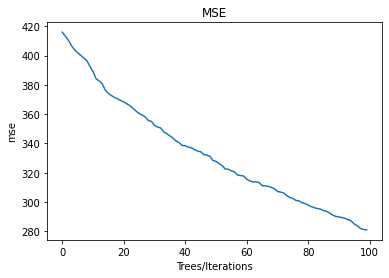

In [233]:
# Разбиение на train и test
# Отрисовка метрики ошибки

import matplotlib.pyplot as plt

X_train = np.array(X[:800])
y_train = np.array(y[:800])


X_test = np.array(X[800:])
y_test = np.array(y[800:])



# def mae(y_true: np.ndarray, y_pred: np.ndarray) -> Tuple[float, np.ndarray]:
#     """Mean absolute error loss function and gradient."""
#     loss = float(np.sum(np.abs(y_pred - y_true)) * 1/y_true.shape)
#     grad = np.sign(y_pred - y_true)
#     return loss, grad

# model = GradientBoostingRegressor(loss=mae)


model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse    = np.mean( ( pred - y_test ) ** 2 )
print(f"MSE | Train = {model.loss_list_[-1]} | Test = {mse}")
print(f"RMSE | Train = {np.sqrt(model.loss_list_[-1])} | Test = {np.sqrt(mse)}")
plt.title('MSE')
plt.ylabel('mse')
plt.xlabel("Trees/Iterations")
plt.plot(model.loss_list_)
plt.show()

